In [1]:
%pip install -q sympy numpy scipy matplotlib ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sympy as sp
import numpy as np
import scipy.constants as const
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import display, Math
from ipywidgets import interactive


<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   height="500px"
   width="500px"
   version="1.1"
   id="svg14"
   sodipodi:docname="pendulums.svg"
   inkscape:version="1.2.2 (b0a8486541, 2022-12-01)"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:svg="http://www.w3.org/2000/svg">
  <defs
     id="defs18" />
  <sodipodi:namedview
     id="namedview16"
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1.0"
     inkscape:showpageshadow="2"
     inkscape:pageopacity="0.0"
     inkscape:pagecheckerboard="0"
     inkscape:deskcolor="#d1d1d1"
     showgrid="false"
     inkscape:zoom="0.944"
     inkscape:cx="147.77542"
     inkscape:cy="229.34322"
     inkscape:window-width="1872"
     inkscape:window-height="1160"
     inkscape:window-x="48"
     inkscape:window-y="40"
     inkscape:window-maximized="1"
     inkscape:current-layer="svg14" />
  <line
     x1="131.98558"
     y1="132.60405"
     x2="182.41951"
     y2="326.14069"
     style="stroke:#000000;stroke-width:2"
     id="line2" />
  <circle
     cx="94.281509"
     cy="361.60147"
     r="20"
     style="fill:#0000ff;stroke:#000000;stroke-width:3"
     id="circle4"
     transform="rotate(-14.605934)" />
  <text
     x="87.884644"
     y="200.77136"
     style="font-size:24px"
     id="text6">θ(t)</text>
  <text
     x="172.20392"
     y="244.1666"
     style="font-size:24px"
     id="text8">l(t)</text>
  <text
     x="171.31422"
     y="366.67813"
     style="font-size:24px"
     id="text10">m</text>
  <line
     x1="389.29114"
     y1="132.72122"
     x2="389.29114"
     y2="332.72125"
     style="stroke:#000000;stroke-width:2"
     id="line864" />
  <circle
     cx="389.29114"
     cy="332.72125"
     r="20"
     style="fill:#0000ff;stroke:#000000;stroke-width:3"
     id="circle866" />
  <text
     x="375.13895"
     y="372.49326"
     style="font-size:24px"
     id="text870">m</text>
  <text
     x="300.95456"
     y="239.92773"
     style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:24px;font-family:sans-serif;-inkscape-font-specification:'sans-serif, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-variant-east-asian:normal"
     id="text872"><tspan
       sodipodi:role="line"
       id="tspan876"
       x="300.95456"
       y="239.92773">L₀ - l(t)</tspan></text>
  <line
     x1="131.41321"
     y1="132.07784"
     x2="390.34708"
     y2="132.07784"
     style="stroke:#000000;stroke-width:2.27567"
     id="line1045" />
  <line
     x1="131.91656"
     y1="131.41649"
     x2="131.91656"
     y2="308.16263"
     style="stroke:#000000;stroke-width:1.19595;stroke-dasharray:4.78378, 9.56757;stroke-dashoffset:0"
     id="line1047" />
  <circle
     style="fill:#ffffff;fill-opacity:1;stroke:#000000;stroke-width:1;stroke-linecap:round;stroke-miterlimit:20;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1;paint-order:markers stroke fill"
     id="path1207"
     cx="386.24875"
     cy="135.08414"
     r="7.0773869" />
  <circle
     style="fill:#ffffff;fill-opacity:1;stroke:#000000;stroke-width:1;stroke-linecap:round;stroke-miterlimit:20;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1;paint-order:markers stroke fill"
     id="circle1273"
     cx="135.56961"
     cy="135.82436"
     r="7.0773869" />
</svg>


In [3]:
# Define the symbols
t = sp.symbols('t')  # Time variable
m, g, L0 = sp.symbols('m g L0')  # Mass, gravity and string length
θ = sp.Function('θ')(t)  # Theta as a function of time
l = sp.Function('l')(t)  # Length as a function of time

# Define the derivatives
θ_dot = sp.diff(θ, t)  # First derivative of θ with respect to time
l_dot = sp.diff(l, t)  # First derivative of l with respect to time
θ_double_dot = sp.diff(θ, t, 2)  # Second derivative of θ with respect to time
l_double_dot = sp.diff(l, t, 2)  # Second derivative of l with respect to time


In [4]:
# Define Lagrangian
T = 1/2 * m * (l_dot**2 + l**2 * θ_dot**2) + 1/2 * m * l_dot**2  # Kinetic energy
V = - m * g * l * sp.cos(θ) - m * g * (L0 - l)  # Potential energy

# Lagrangian
L = T - V


In [5]:
display(Math('T = ' + sp.latex(T)))
display(Math('V = ' + sp.latex(V)))
display(Math('L = T - V = ' + sp.latex(L)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# Derive equations of motion (Applying Euler-Lagrange equations)
del_θ = sp.diff(sp.diff(L, θ_dot), t) - sp.diff(L, θ)
del_l = sp.diff(sp.diff(L, l_dot), t) - sp.diff(L, l)


In [7]:
# Simplify the equations
del_θ = sp.simplify(del_θ)
del_l = sp.simplify(del_l)

display(Math(sp.latex(del_θ) + ' = 0'))
display(Math(sp.latex(del_l) + ' = 0'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# Convert to expressions for the second derivatives
θ_double_dot_expr = sp.solve(del_θ, θ_double_dot)[0]
l_double_dot_expr = sp.solve(del_l, l_double_dot)[0]
display(Math('\ddot{θ}(t) = ' + sp.latex(θ_double_dot_expr)))
display(Math('\ddot{l}(t) = ' + sp.latex(l_double_dot_expr)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# Convert sympy expressions to lambdified functions for numerical evaluation

θ_double_dot_num_expr = sp.lambdify(
    (θ, l, θ_dot, l_dot, m, g, L0), θ_double_dot_expr, 'numpy')
l_double_dot_num_expr = sp.lambdify(
    (θ, l, θ_dot, l_dot, m, g, L0), l_double_dot_expr, 'numpy')


In [10]:
def pendulum_system(y, t, m, g, L0):
    # Unpack the system state variables
    θ_n, l_n, θ_dot_n, l_dot_n = y

    θ_double_dot_n = θ_double_dot_num_expr(
        θ_n, l_n, θ_dot_n, l_dot_n, m, g, L0)
    l_double_dot_n = l_double_dot_num_expr(
        θ_n, l_n, θ_dot_n, l_dot_n, m, g, L0)

    return [θ_dot_n, l_dot_n, θ_double_dot_n, l_double_dot_n]


In [11]:
def solve_pendulum_system(θ0=const.pi/32, l0=1.0, θ_dot0=0.0, l_dot0=0.0, duration=10):
    # set the parameters for the motion
    m = 1.0  # mass. The equations above do not really depend on it, but defining it here for completeness

    # # set the initial conditions
    # θ0 = const.pi/32
    # l0 = 1.0
    # θ_dot0 = 0.0
    # l_dot0 = 0.0

    # duration = 10

    # set the time values at which to solve
    # from 0 to `duration` seconds, 10000 evaluation points
    t = np.linspace(0, duration, 10000)

    # solve the system
    solution = odeint(pendulum_system, [
        θ0, l0, l_dot0, θ_dot0], t, args=(m, const.g, l0))

    θ_n_t = solution[:, 0]
    l_n_t = solution[:, 1]

    # Visualize the solution
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(t, l_n_t)
    plt.xlabel('time (t)')
    plt.ylabel('l(t)')

    plt.subplot(1, 2, 2)
    plt.plot(t, θ_n_t)
    plt.xlabel('time (t)')
    plt.ylabel('θ(t)')
    plt.show()


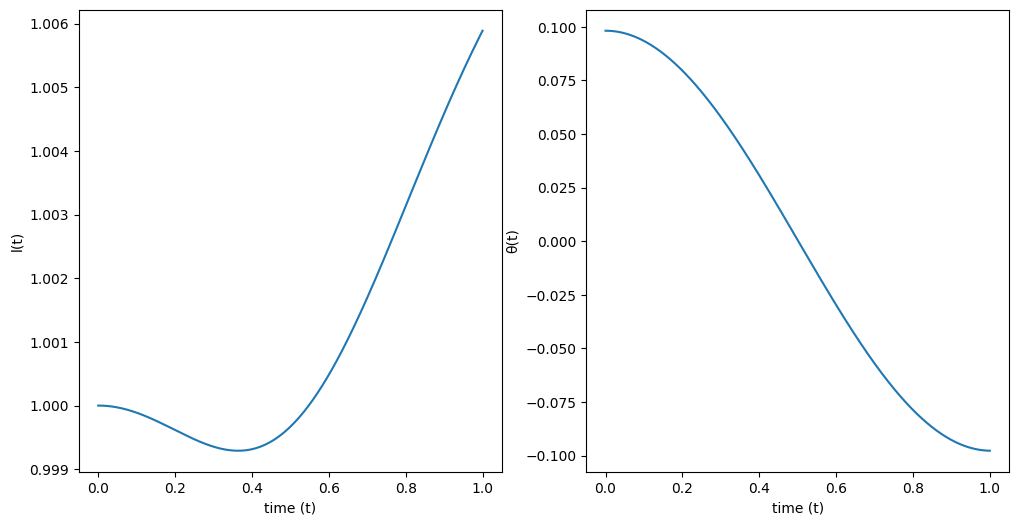

In [12]:
solve_pendulum_system(θ0=const.pi/32, l0=1.0, θ_dot0=0.0, l_dot0=0.0, duration=1)

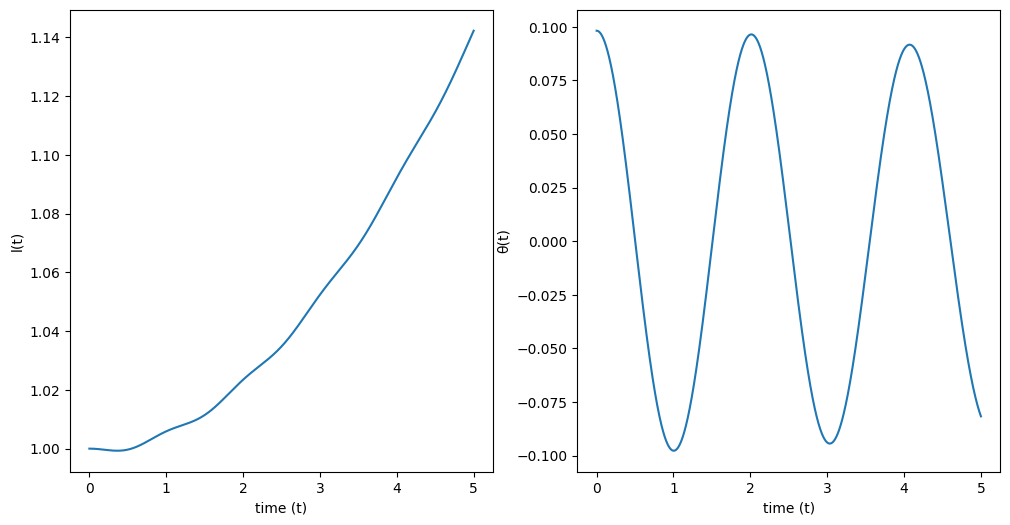

In [13]:
solve_pendulum_system(θ0=const.pi/32, l0=1.0, θ_dot0=0.0, l_dot0=0.0, duration=5)

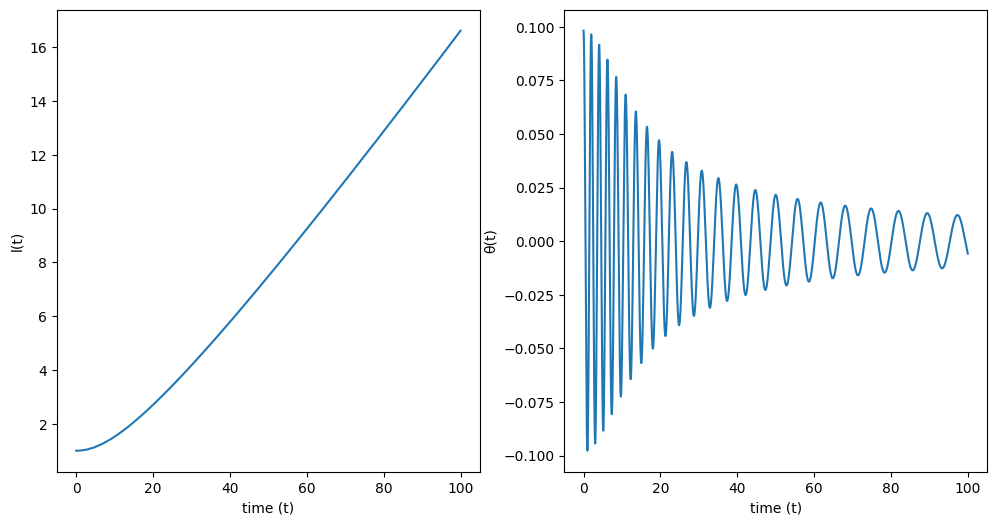

In [14]:
solve_pendulum_system(θ0=const.pi/32, l0=1.0, θ_dot0=0.0, l_dot0=0.0, duration=100)

In [15]:

w = interactive(solve_pendulum_system, θ0=(0, const.pi/4), l0=(1.0, 100),
                θ_dot0=(0.0, const.pi), l_dot0=(0.0, 10), duration=(0.1, 100))

w


interactive(children=(FloatSlider(value=0.09817477042468103, description='θ0', max=0.7853981633974483), FloatS…